In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib import rc
plt.rc('font', family='NanumBarunGothic')

In [2]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0,init='k-means++')
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
        

In [147]:
df = pd.read_pickle('dataset2/df_ml_12.pkl')
df

,고객번호,성별,연령대,거주지역랭크,membership_abs,객단가_Net,객단가_Abs,가공식품_r_Net,가공식품_r_Abs,가구/인테리어_r_Net,...,C_ratio_Abs,D_ratio_Net,D_ratio_Abs,Frequency_Net,Frequency_Abs,Recency_Net,Recency_Abs,구매금액_Net,구매금액_Abs,target
0,1,1,9,34,0.0,1,1,1,1,2,...,1,0,0,0,0,0,0,0,0,1
1,2,1,9,17,0.0,0,0,0,0,-1,...,0,0,0,-2,2,0,0,0,0,0
2,3,1,9,9,0.0,0,0,0,0,0,...,0,0,0,1,1,-3,3,0,0,1
3,4,0,9,20,0.0,1,1,-1,1,2,...,1,0,0,-3,3,3,3,-2,2,1
4,5,1,9,17,0.0,1,1,-1,1,-1,...,0,0,0,-7,7,-6,6,-5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19080,19356,0,5,17,0.0,-1,1,1,1,2,...,0,0,0,5,5,0,0,0,0,0
19081,19357,0,5,8,1.0,2,2,1,1,2,...,2,0,0,8,8,2,2,3,3,0
19082,19359,1,7,17,0.0,0,0,0,0,0,...,0,0,0,9,9,5,5,0,0,0
19083,19360,0,6,4,0.0,-1,1,-1,1,0,...,0,0,0,4,4,1,1,1,1,0


In [148]:
df_1 = df[(df['target']==1)]
df_1 = df_1.reset_index().drop('index',axis=1)

In [149]:
test_df = df[(df['target']==1)]
# test_df = test_df.drop('거주지역',axis=1)
df_target = test_df['target']
test_df = test_df.drop('target',axis=1)

In [150]:
notp_df = test_df.drop(['고객번호'],axis=1)

In [151]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 35)
pca_df = pca.fit_transform(notp_df)
pca_df = pd.DataFrame(pca_df)

pca_df


sum(pca.explained_variance_ratio_)

0.9308650693092752

In [152]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(notp_df)
print(pca.n_components_)

40


In [141]:
# def evr(num):
    
#     pca = PCA(n_components = num)
#     pca_df = pca.fit_transform(notp_df)
#     pca_df = pd.DataFrame(pca_df)
    
#     print('차원의 수: ',num)
#     print(sum(pca.explained_variance_ratio_))
#     print()

# for i in range(2,10):
#     evr(i)

In [153]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit(notp_df)
kmlabels = pd.DataFrame(kmeans.labels_)
kmlabels.columns = ['label']
kmlabels

cluster_df = pd.concat([df_1,kmlabels],axis=1)
cluster_df.head(2)

dummies_data = pd.get_dummies(cluster_df['label'])

cluster_df = pd.concat([df_1,dummies_data],axis=1)
cluster_df = cluster_df.drop(['고객번호','target'],axis=1)
cluster_df.head(2)

,성별,연령대,거주지역랭크,membership_abs,객단가_Net,객단가_Abs,가공식품_r_Net,가공식품_r_Abs,가구/인테리어_r_Net,가구/인테리어_r_Abs,...,D_ratio_Abs,Frequency_Net,Frequency_Abs,Recency_Net,Recency_Abs,구매금액_Net,구매금액_Abs,0,1,2
0,1,9,34,0.0,1,1,1,1,2,2,...,0,0,0,0,0,0,0,0,1,0
1,1,9,9,0.0,0,0,0,0,0,0,...,0,1,1,-3,3,0,0,1,0,0


In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from matplotlib import rc
plt.style.use('seaborn-dark')
rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False #



def model_act(cluster_num):
    X = cluster_df.drop([0,1,2],axis=1)
    y = cluster_df[cluster_num]

    X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

    dt = DecisionTreeClassifier(max_depth=4)
    dt.fit(X_train, y_train)
    dt_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, dt_pred)
    
    print('정확도 : ',accuracy)
    
    plt.figure(figsize=(20,15))

    tree.plot_tree(dt, filled=True,
                  feature_names = X.columns,
                  class_names = 'clusters',
                  rounded=True)
    plt.title('군집 {}의 tree'.format(cluster_num),fontsize=30)
    plt.show()

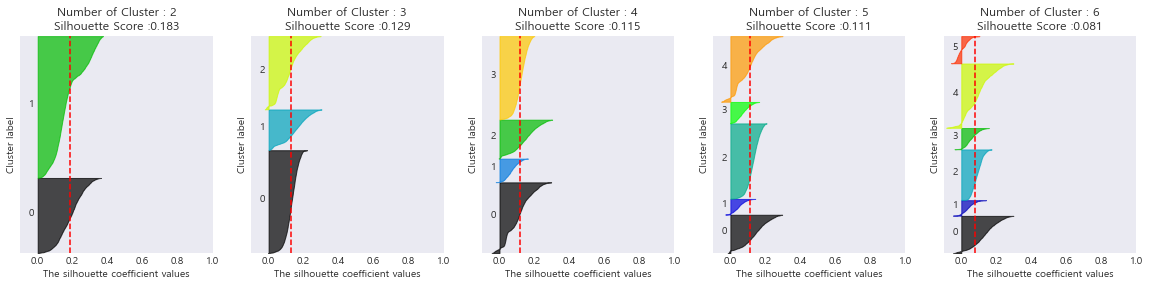

In [154]:
visualize_silhouette([2,3,4,5,6], notp_df)

정확도 :  0.9973060344827587


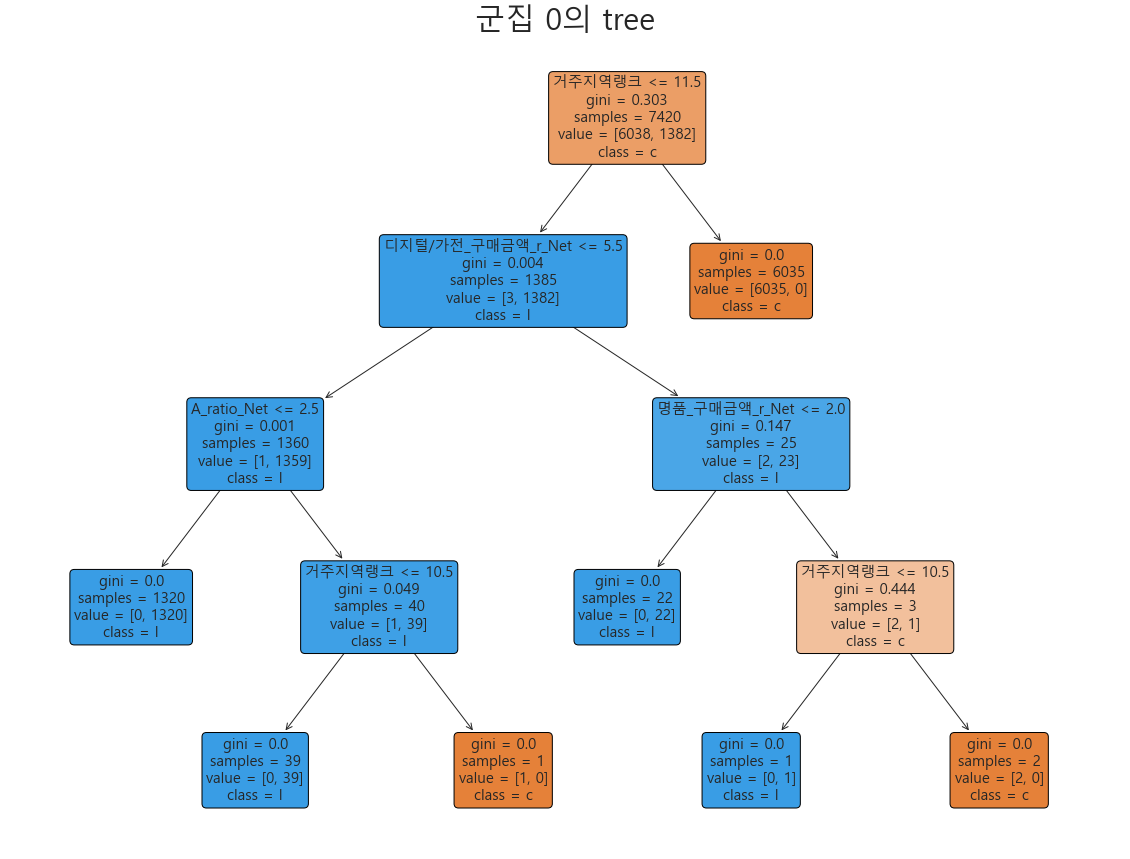

정확도 :  1.0


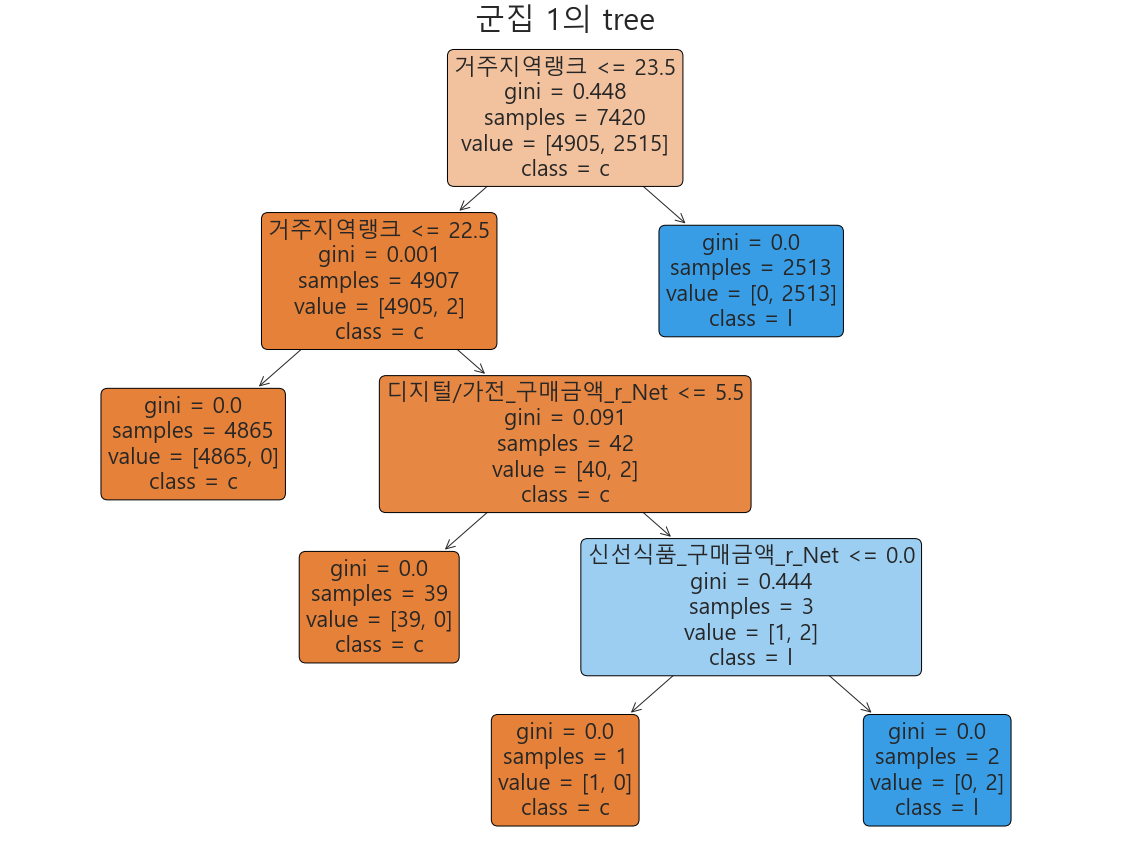

정확도 :  0.9983836206896551


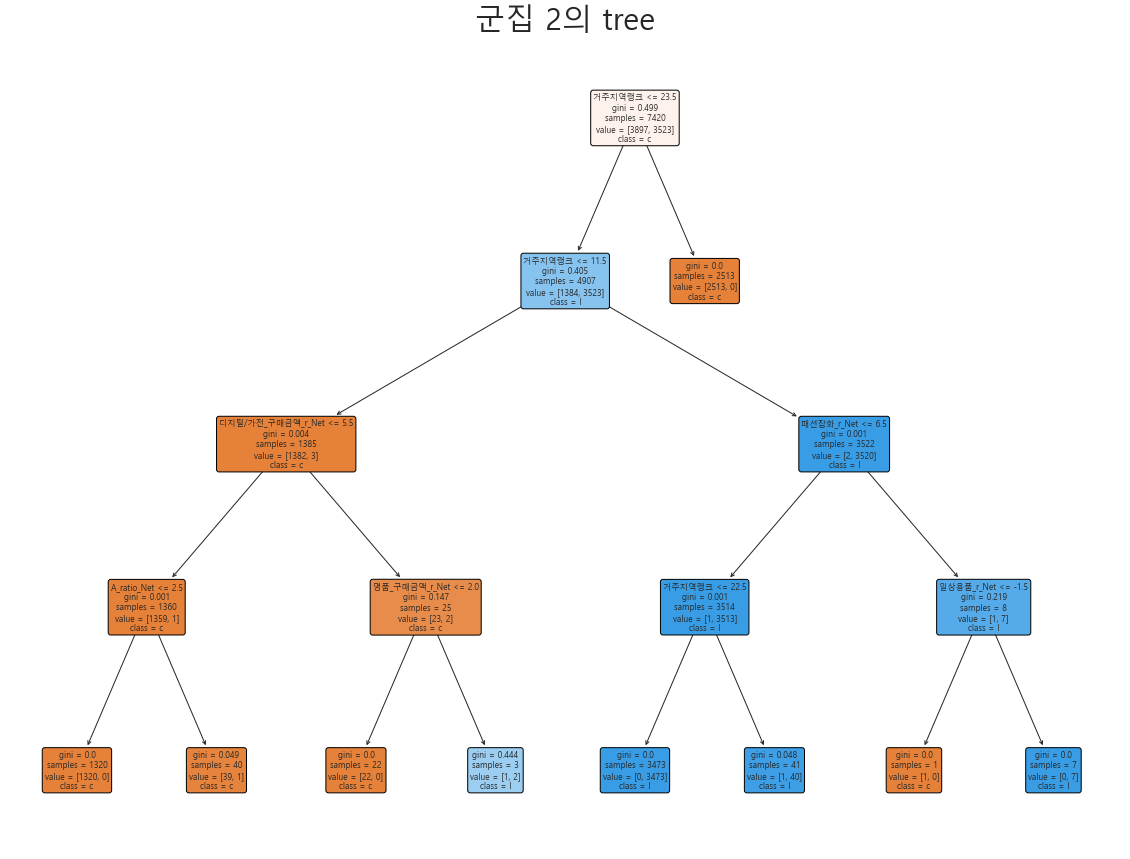

In [157]:
for i in range(3):
    model_act(i)

In [158]:
import pickle5 as pickle

print(train_path)
with open(f'{train_path}', 'rb') as train_read:
  train = pickle.load(train_read)

## Train


print('<Train>')

def get_corr(train, upper_condition_n, most_up_condition_n): 
  cr = train.corr()
  cr_p = cr.unstack()
  cr_v = cr_p.sort_values()
  cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
  A = print(dict(cond))
  return A  
print('corr')
get_corr(train,0.69,1)

print()


from sklearn.model_selection import train_test_split
X = train.drop('target',axis=1)
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

lr = LogisticRegression()
svm = SVC(probability=True)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


from tqdm import tqdm
models = [lr,svm,dt,rf]
for model in tqdm(models):
    model.fit(X_train,y_train)

def varName(p):
    for k, v in globals().items():
        if id(p) == id(v):
            return k

for model in tqdm(models):
    globals()[f'{varName(model)}_pred'] = model.predict(X_test)


for model in tqdm(models):
    globals()[f'{varName(model)}_proba'] = model.predict_proba(X_test)[:,1]

def get_eval(name,y_test,prediction,proba):
    Label = np.unique([y_test, prediction])
    confusion= pd.DataFrame(confusion_matrix(y_test, prediction, labels=Label), 
                            index=['true:{:}'.format(x) for x in Label], 
                            columns=['pred:{:}'.format(x) for x in Label])
    accuracy = accuracy_score(y_test,prediction)
    precision = precision_score(y_test,prediction)
    recall = recall_score(y_test,prediction)
    f1 = f1_score(y_test,prediction)
    roc_auc = roc_auc_score(y_test,proba)
    print('[model]', name,'\n')
    print('[confusion_matrix]', confusion,'\n')
    print('[accuracy]: {:.4f}'.format(accuracy))
    print('[precision]: {:.4f}'.format(accuracy))
    print('[recall]: {:.4f}'.format(recall))
    print('[f1_score]: {:.4f}'.format(f1))
    print('[roc_auc]: {:.4f}'.format(roc_auc))
    print('-------'*10)

predicts = [lr_pred,svm_pred,dt_pred,rf_pred]
probas= [lr_proba, svm_proba, dt_proba, rf_proba]


from xgboost import XGBClassifier

evals = [(X_test,y_test)]
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1,max_depth =3)
xgb.fit(X_train,y_train)
xgb_preds = xgb.predict(X_test)
xgb_preds_proba = xgb.predict_proba(X_test)[:,1]

from lightgbm import LGBMClassifier
lgbm =LGBMClassifier(n_estimators=400)
evals= [(X_test,y_test)]
lgbm.fit(X_train, y_train)
lgbm_preds = lgbm.predict(X_test)
lgbm_preds_proba = lgbm.predict_proba(X_test)[:,1]


for name,predict, proba in zip(models, predicts , probas):
  get_eval(name,y_test,predict,proba)


get_eval(xgb,y_test,xgb_preds,xgb_preds_proba)
get_eval(lgbm,y_test,lgbm_preds,lgbm_preds_proba)


print()


print(test_path)

# TEST
print('<TEST>')


with open(f'{test_path}', 'rb') as test_read:
  test = pickle.load(test_read)

print('corr')
get_corr(test,0.69,1)
print()


검증 = test.drop('target',axis=1)
정확도검증 = test['target']

models = [lr,svm,dt,rf]
def varName(p):
    for k, v in globals().items():
        if id(p) == id(v):
            return k

for model in tqdm(models):
    globals()[f'{varName(model)}_pred'] = model.predict(검증)

for model in tqdm(models):
    globals()[f'{varName(model)}_proba'] = model.predict_proba(검증)[:,1]

xgb_preds = xgb.predict(검증)
xgb_preds_proba = xgb.predict_proba(검증)[:,1]

lgbm_preds = lgbm.predict(검증)
lgbm_preds_proba = lgbm.predict_proba(검증)[:,1]

print()
predicts = [lr_pred,svm_pred,dt_pred,rf_pred]
probas= [lr_proba, svm_proba, dt_proba, rf_proba]

for name,predict,proba in zip(models, predicts,probas):
  get_eval(name,정확도검증,predict,proba)

get_eval(xgb,정확도검증,xgb_preds,xgb_preds_proba)
get_eval(lgbm,정확도검증,lgbm_preds,lgbm_preds_proba)

print()
print('lgbm Feature importance')
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm,ax=ax)


ModuleNotFoundError: No module named 'pickle5'